A short introduction to fast SPT modeling
-----------------------------------------

This notebook presents a short introduction to the modeling of fast single particle tracking datasets. 
The methodology, together with examples of biological relevance, can be found at:

> Hansen, Anders S., Iryna Pustova, Claudia Cattoglio, Robert Tjian, and Xavier Darzacq. “CTCF and Cohesin Regulate Chromatin Loop Stability with Distinct Dynamics.” bioRxiv, 2016, 093476.

This package includes several sample datasets, that will be used by this notebook. Make sure that they can be found by Python.

## 1. Loading of a dataset

To help us with basic and repeated tasks such as dataset loading, we created a small library, `fastSPT_tools` that contain several helper functions that we will use all across this tutorial. We thus need to import it by typing `import fastSPT_tools`.

One of the functions list the available datasets: `list_sample_datasets(path)`. Let's first see what datasets we can get. Then, we will use the `load_dataset(path, dataset_id, cells)` function to load the relevant dataset. This latter function can either load one single cell or a series of cells (identified by their id).

In [1]:
import sys
from tqdm.autonotebook import tqdm
sys.version

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

C:\Users\andre\Programs\Miniconda\envs\spoton\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import lmfit

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

import fastspt as fs
from fastspt import fit, tools, plot, readers, matimport, tracklen
%load_ext autoreload

%autoreload 2

print("Using fastspt version {}".format(fs.__version__))

import logging
logger = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using fastspt version 16.3


In [3]:
import os
os.getcwd()

'C:\\Users\\andre\\Documents\\Spot-On-cli'

In [4]:
xml_path = r"Z:\Andrey\data\2019\0503-e-coli-PBP2-PAmCh\S1\561nm-continuous-60ms_3\561nm-continuous-60ms_3_MMStack_Pos0.ome.tif.TMtracks.xml"
path_wt = r"Z:\Andrey\fromGizem\2019-04-18-PBP2-tracks\WTforAndrey.mat"
path_oe = r"Z:\Andrey\fromGizem\2019-04-18-PBP2-tracks\PBP2OverExpforAndrey.mat"


In [5]:
cell = readers.read_trackmate_xml(xml_path)
reps = [cell]
data_path = xml_path

In [5]:
from glob import glob

In [6]:
data_paths = glob('z:/Andrey/fromGizem/2019-04-18-PBP2-tracks/*.mat')

In [7]:
data_paths

['z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\A22inliq30forAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\deltaPBP1aforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\PBP2OverExpforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\RodZdepl12hforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\RodZforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\WTforAndrey.mat']

In [8]:
data_path = data_paths[3]
print(data_path)

z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\RodZdepl12hforAndrey.mat


In [10]:
all_exp = matimport.read_gizem_mat(data_path)
#all_exp = table_import(data_path)
#cell4 = matimport.concat_all(all_exp, exposure_ms=60., pixel_size_um=0.075)
if all_exp:
    reps = matimport.concat_reps(all_exp, exposure_ms=60., pixel_size_um=0.075)

discovered 3 replicates containing [8, 11, 13] acquisitions
Assembling tracks with minimal length 3, using exposure 60.0 ms and px size 0.075 µm


73  tracks 
422  tracks 
280  tracks 
434  tracks 
388  tracks 
242  tracks 
307  tracks 
149  tracks 
Replicate 1: Total 2295 tracks


921  tracks 
1110  tracks 
803  tracks 
716  tracks 
667  tracks 
849  tracks 
964  tracks 
531  tracks 
725  tracks 
1040  tracks 
988  tracks 
Replicate 2: Total 9314 tracks


686  tracks 
502  tracks 
467  tracks 
479  tracks 
633  tracks 
559  tracks 
567  tracks 
561  tracks 
465  tracks 
430  tracks 
558  tracks 
695  tracks 
679  tracks 
Replicate 3: Total 7281 tracks



# 2. Track lengths analysis

740 tracks, 5065 localizations
Fit result: 1690.64 * e^(-x/1.99) + 10.44


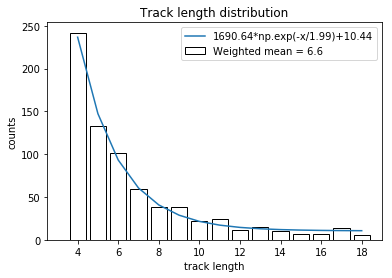

In [13]:
for rep in reps:
    tracklen.get_track_lengths_dist(rep, plot=True)

## 3. Fitting of the jump lengths distribution to the model (2 states)


Number of frames: 1000.0, number of localizations: 5065
Computation of jump lengths performed in 1.08s
Improved fit on iteration 1
Improved error is 9.086419459582562e-06
Name        Value      Min      Max   Stderr
D_bound  2.776e-19        0    0.005 2.876e-05
D_fast    0.08141     0.01        1 0.006668
D_med     0.01639    0.005      0.1 0.003576
F_bound    0.4093        0        1  0.01461
F_fast     0.3834        0        1  0.03426
sigma     0.03419    0.005      0.1 0.0004239
None


C:\Users\andre\Documents\Spot-On-cli\fastspt\fit.py:662: RuntimeWarning: invalid value encountered in true_divide
  norm_y[i,:] = y[i,:]/y[i,:].sum()


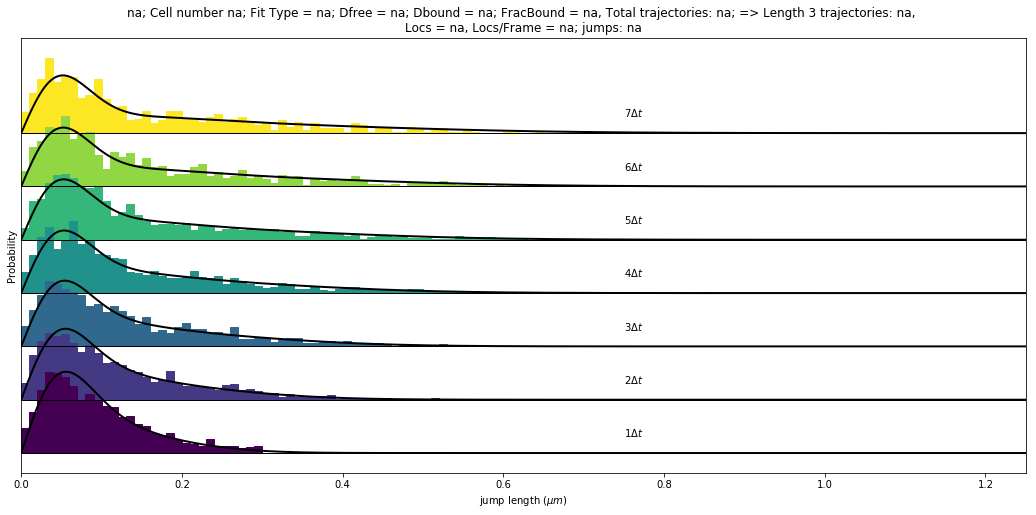

In [14]:
## Generate a dictionary of parameters
fit_params = dict(states=3,
                 iterations=1,
                 CDF=False,
                 CDF1 = True,
                 Frac_Bound = [0, 1],
                 D_Free = [0.01, 1.],
                 D_Med = [0.005, 0.1],
                 D_Bound = [0.0, 0.005],
                 sigma = 0.02,
                 sigma_bound = [0.005, 0.1],
                 fit_sigma=True,
                 dT=0.06,
                 dZ=0.7,
                 a=0.15716,
                 b=0.20811,
                 useZcorr=False,
                 plot_hist=False,
                 plot_result=True) 


def my_fit(rep):
    
    cell_spt = readers.to_fastSPT(rep, from_json=False)
    fit_result = tools.auto_fit(cell_spt,
                                fit_params=fit_params)
    return fit_result

reps_fits = list(map(my_fit, reps))


In [15]:
#get stats
fit_stats = pd.DataFrame(columns=reps_fits[0].best_values.keys())

for i, fit_result in enumerate(reps_fits):
    fit_stats.loc[f'rep {i+1}'] = list(fit_result.best_values.values())

fit_stats.loc['mean'] = fit_stats.mean(axis=0)
fit_stats.loc['std'] = fit_stats.std(axis=0)

fit_stats.to_json(data_path + '.stats.json')

fit_stats
#fit_stats.to_excel(path_oe + '.stats.xls')

,D_fast,D_med,D_bound,F_fast,F_bound,sigma
rep 1,0.081413,0.01639,2.775558e-19,0.383354,0.409252,0.034193
mean,0.081413,0.01639,2.775558e-19,0.383354,0.409252,0.034193
std,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000


In [16]:
pd.read_json(r"Z:/Andrey/fromGizem/2019-04-18-PBP2-tracks/PBP2OverExpforAndrey.mat.stats.json",)

,D_fast,D_med,D_bound,F_fast,F_bound,sigma,chi2
mean,0.036449,0.011052,1.067581e-04,0.547984,0.123352,0.019759,0.001334
rep 1,0.036826,0.010664,1.053494e-04,0.521843,0.128585,0.019831,0.001504
rep 2,0.041200,0.015000,2.149249e-04,0.467069,0.124263,0.020219,0.001203
rep 3,0.031321,0.007492,7.549517e-17,0.655040,0.117209,0.019227,0.001295
std,0.004042,0.003078,8.774840e-05,0.078933,0.004689,0.000408,0.000126
